In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras import regularizers


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics
from keras.models import model_from_json
import keras.backend as K

Using TensorFlow backend.


# Data Preparation

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [9]:
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
194066,-0.296793,0.537307,2.085800,-0.007503,-2.051018,0.211332,0.605291,-0.893311,0.503455,-0.277635,...,-0.256134,0.137768,0.500125,0.007131,0.826924,0.336715,0.660079,-0.126411,-0.089595,0
189279,8.243136,0.512670,-1.894812,-2.158691,1.484196,-0.454942,-1.790542,1.379263,1.395199,0.155463,...,1.056567,-0.148051,-0.934658,1.280111,0.459275,0.626942,-0.317816,-0.102454,0.139521,0
178204,1.282750,0.456208,1.750366,-0.893112,-0.182786,0.480302,-0.908783,0.132239,-0.849611,0.215751,...,-0.002988,0.098596,0.133977,0.161131,-0.500113,-0.568744,0.169177,-0.020691,-0.031965,0
34059,0.167261,-0.554483,1.413262,-0.863781,-1.279362,-1.608896,1.494949,3.377203,-0.998847,0.781369,...,0.215057,0.013824,-0.056709,-0.160754,1.048262,0.837852,-0.133072,0.003754,0.005898,0
226464,-0.015371,0.704191,-0.397627,0.638765,1.307878,-0.572302,-0.587297,0.023115,-1.020044,-2.559051,...,0.534069,-1.633004,-0.821785,-0.114568,-0.159119,1.091205,0.460374,-0.070443,0.159151,0


In [12]:
# sb.countplot(new_data['Class'])

# Data Splitter

In [13]:
size=len(non_fraud_data)

In [14]:
NF_Global=non_fraud_data[:int(size*0.1)]
NF_Model_1A=non_fraud_data[int(size*0.1):int(size*0.3)]
NF_Model_2A=non_fraud_data[int(size*0.3):int(size*0.45)]
NF_Model_3A=non_fraud_data[int(size*0.45):int(size*0.50)]
NF_Model_1B=non_fraud_data[int(size*0.50):int(size*0.70)]
NF_Model_2B=non_fraud_data[int(size*0.70):int(size*0.85)]
NF_Model_3B=non_fraud_data[int(size*0.85):int(size*0.9)]
NF_Test=non_fraud_data[int(size*0.9):]

In [15]:
size=len(fraud_data)

In [16]:
F_Global=fraud_data[:int(size*0.1)]
F_Model_1A=fraud_data[int(size*0.1):int(size*0.3)]
F_Model_2A=fraud_data[int(size*0.3):int(size*0.45)]
F_Model_3A=fraud_data[int(size*0.45):int(size*0.50)]
F_Model_1B=fraud_data[int(size*0.50):int(size*0.70)]
F_Model_2B=fraud_data[int(size*0.70):int(size*0.85)]
F_Model_3B=fraud_data[int(size*0.85):int(size*0.9)]
F_Test=fraud_data[int(size*0.9):]


In [17]:
Data_Global =pd.concat([NF_Global,F_Global])
Data_Model_1A=pd.concat([NF_Model_1A,F_Model_1A])
Data_Model_2A=pd.concat([NF_Model_2A,F_Model_2A])
Data_Model_3A=pd.concat([NF_Model_3A,F_Model_3A])
Data_Model_1B=pd.concat([NF_Model_1B,F_Model_1B])
Data_Model_2B=pd.concat([NF_Model_2B,F_Model_2B])
Data_Model_3B=pd.concat([NF_Model_3B,F_Model_3B])
Data_Test=pd.concat([NF_Test,F_Test])

In [18]:
list_partitions=[Data_Global,Data_Model_1A,Data_Model_2A,Data_Model_3A,Data_Model_1B,Data_Model_2B,Data_Model_3B,Data_Test]
print("DataSet,   size")
for i in range(len(list_partitions)):
    print(i,"   ",len(list_partitions[i])/len(data)*100)
    

DataSet,   size
0     9.999754219524098
1     19.99985955401377
2     14.999982444251723
3     5.000228224727622
4     19.99985955401377
5     14.999982444251723
6     4.999877109762049
7     10.000456449455244


In [19]:
def DataBalancer(data):
    fraud_data = data.loc[data['Class'] == 1]
    non_fraud_data = data.loc[data['Class'] == 0].sample(len(fraud_data))

    return pd.concat([fraud_data, non_fraud_data])
    

In [20]:
def split(data):
    X=data.copy()
    X.drop(['Class'],axis=1,inplace=True)
    Y=data[['Class']]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    return X_train, Y_train,X_test,Y_test

# Model Store/Load

In [21]:
def saveModel(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

In [22]:
def loadModel():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    return loaded_model

# Custom Loss (not implemented yet)

In [24]:
def binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight):
    
    TN = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 0)
    TP = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 1)

    FP = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 1)
    FN = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 0)

    # Converted as Keras Tensors
    TN = K.sum(K.variable(TN))
    FP = K.sum(K.variable(FP))

    specificity = TN / (TN + FP + K.epsilon())
    recall = TP / (TP + FN + K.epsilon())

    return 1.0 - (recall_weight*recall + spec_weight*specificity)

In [25]:
def custom_loss(recall_weight, spec_weight):

    def recall_spec_loss(y_true, y_pred):
        return binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight)

    # Returns the (y_true, y_pred) loss function
    return recall_spec_loss

In [26]:
def penalized_loss():
    def loss(y_true, y_pred):
        return K.mean(K.square(y_pred - y_true) - K.square(y_true), axis=-1)
    return loss

# Model Architecture

In [ ]:
result_array=[]

In [41]:
input_shape=(30,)
def Model():

    model = Sequential()
    model.add(Dense(32, activation='relu',input_shape=input_shape,kernel_regularizer=regularizers.l2(0.01))) 
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    
    
    model.compile(optimizer='adam',   #rmsprop
                  loss= "binary_crossentropy",#[custom_loss()]
                  metrics=['acc']
                 )

    return model

In [42]:
epoch=30

In [43]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Global))
K.clear_session() 
model=Model()
model.fit(X_train, Y_train, epochs=epoch,validation_split=0.1, verbose=1)

Train on 79 samples, validate on 9 samples
Epoch 1/30
79/79 [==============================] - 0s 4ms/step - loss: 1.8837 - acc: 0.5063 - val_loss: 1.1726 - val_acc: 0.7778
Epoch 2/30
79/79 [==============================] - 0s 0us/step - loss: 1.4217 - acc: 0.5570 - val_loss: 1.0227 - val_acc: 0.7778
Epoch 3/30
79/79 [==============================] - 0s 198us/step - loss: 1.2914 - acc: 0.5696 - val_loss: 0.9451 - val_acc: 0.8889
Epoch 4/30
79/79 [==============================] - 0s 0us/step - loss: 1.0598 - acc: 0.6709 - val_loss: 0.9212 - val_acc: 0.7778
Epoch 5/30
79/79 [==============================] - 0s 51us/step - loss: 1.1396 - acc: 0.6456 - val_loss: 0.9175 - val_acc: 0.7778
Epoch 6/30
79/79 [==============================] - 0s 51us/step - loss: 0.8738 - acc: 0.6709 - val_loss: 0.9184 - val_acc: 0.6667
Epoch 7/30
79/79 [==============================] - 0s 101us/step - loss: 0.8897 - acc: 0.6835 - val_loss: 0.9204 - val_acc: 0.5556
Epoch 8/30
79/79 [=======================

In [44]:
print("accuracy for Global Model")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Global Model
10/10 [==============================] - 0s 0us/step


89.99999761581421

In [45]:
saveModel(model)

Saved model to disk


In [46]:
w0=np.array(loadModel().get_weights())

Loaded model from disk


In [47]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_1A))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=epoch,validation_split=0.2, verbose=1)

Loaded model from disk
Train on 140 samples, validate on 36 samples
Epoch 1/30
140/140 [==============================] - 0s 2ms/step - loss: 0.6262 - acc: 0.8500 - val_loss: 0.5678 - val_acc: 1.0000
Epoch 2/30
140/140 [==============================] - 0s 57us/step - loss: 0.6169 - acc: 0.8929 - val_loss: 0.5511 - val_acc: 1.0000
Epoch 3/30
140/140 [==============================] - 0s 64us/step - loss: 0.6023 - acc: 0.8929 - val_loss: 0.5393 - val_acc: 1.0000
Epoch 4/30
140/140 [==============================] - 0s 64us/step - loss: 0.6006 - acc: 0.8714 - val_loss: 0.5282 - val_acc: 0.9722
Epoch 5/30
140/140 [==============================] - 0s 64us/step - loss: 0.5756 - acc: 0.8786 - val_loss: 0.5181 - val_acc: 0.9722
Epoch 6/30
140/140 [==============================] - 0s 57us/step - loss: 0.5483 - acc: 0.9143 - val_loss: 0.5077 - val_acc: 0.9722
Epoch 7/30
140/140 [==============================] - 0s 71us/step - loss: 0.5228 - acc: 0.9429 - val_loss: 0.4976 - val_acc: 0.9722
Ep

In [48]:
delta_1A=w0-loaded_model.get_weights()

In [49]:
print("accuracy for Model 1A")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 1A
20/20 [==============================] - 0s 0us/step


80.0000011920929

In [50]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_2A))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=epoch,validation_split=0.2, verbose=1)

Loaded model from disk
Train on 106 samples, validate on 27 samples
Epoch 1/30
106/106 [==============================] - 0s 4ms/step - loss: 0.5944 - acc: 0.8962 - val_loss: 0.6393 - val_acc: 0.8519
Epoch 2/30
106/106 [==============================] - 0s 173us/step - loss: 0.5776 - acc: 0.8774 - val_loss: 0.6279 - val_acc: 0.8519
Epoch 3/30
106/106 [==============================] - 0s 75us/step - loss: 0.5572 - acc: 0.9245 - val_loss: 0.6155 - val_acc: 0.8519
Epoch 4/30
106/106 [==============================] - 0s 76us/step - loss: 0.5464 - acc: 0.9245 - val_loss: 0.6026 - val_acc: 0.9259
Epoch 5/30
106/106 [==============================] - 0s 40us/step - loss: 0.5488 - acc: 0.9057 - val_loss: 0.5908 - val_acc: 0.9630
Epoch 6/30
106/106 [==============================] - 0s 38us/step - loss: 0.5144 - acc: 0.9245 - val_loss: 0.5789 - val_acc: 0.9630
Epoch 7/30
106/106 [==============================] - 0s 75us/step - loss: 0.5170 - acc: 0.9151 - val_loss: 0.5669 - val_acc: 0.9630
E

In [51]:
delta_2A=w0-loaded_model.get_weights()


In [52]:
print("accuracy for Model 2A")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 2A
15/15 [==============================] - 0s 0us/step


93.33333373069763

In [53]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_3A))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=epoch,validation_split=0.2, verbose=1)

Loaded model from disk
Train on 36 samples, validate on 9 samples
Epoch 1/30
36/36 [==============================] - 0s 13ms/step - loss: 0.6800 - acc: 0.8889 - val_loss: 0.4905 - val_acc: 1.0000
Epoch 2/30
36/36 [==============================] - 0s 111us/step - loss: 0.6613 - acc: 0.8611 - val_loss: 0.4878 - val_acc: 1.0000
Epoch 3/30
36/36 [==============================] - 0s 111us/step - loss: 0.6433 - acc: 0.9167 - val_loss: 0.4859 - val_acc: 1.0000
Epoch 4/30
36/36 [==============================] - 0s 111us/step - loss: 0.5819 - acc: 0.8611 - val_loss: 0.4831 - val_acc: 1.0000
Epoch 5/30
36/36 [==============================] - 0s 222us/step - loss: 0.6273 - acc: 0.8333 - val_loss: 0.4802 - val_acc: 1.0000
Epoch 6/30
36/36 [==============================] - 0s 111us/step - loss: 0.6164 - acc: 0.8889 - val_loss: 0.4770 - val_acc: 1.0000
Epoch 7/30
36/36 [==============================] - 0s 222us/step - loss: 0.5848 - acc: 0.8611 - val_loss: 0.4736 - val_acc: 1.0000
Epoch 8/30


In [54]:
delta_3A=w0-loaded_model.get_weights()

In [55]:
print("accuracy for Model 3A")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 3A
5/5 [==============================] - 0s 0us/step


100.0

In [56]:
delta=(delta_1A+delta_2A+delta_3A)/3

In [57]:
w1=w0+delta

In [58]:
loaded_model=loadModel()
loaded_model.set_weights(w1)
saveModel(loaded_model)

Loaded model from disk
Saved model to disk


In [59]:
w1=np.array(loadModel().get_weights())

Loaded model from disk


In [60]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_1B))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=epoch,validation_split=0.1, verbose=1)

Loaded model from disk
Train on 158 samples, validate on 18 samples
Epoch 1/30
158/158 [==============================] - 1s 4ms/step - loss: 0.8492 - acc: 0.5886 - val_loss: 0.8528 - val_acc: 0.5556
Epoch 2/30
158/158 [==============================] - 0s 0us/step - loss: 0.8396 - acc: 0.5886 - val_loss: 0.8401 - val_acc: 0.5556
Epoch 3/30
158/158 [==============================] - 0s 99us/step - loss: 0.8321 - acc: 0.6139 - val_loss: 0.8304 - val_acc: 0.5556
Epoch 4/30
158/158 [==============================] - 0s 0us/step - loss: 0.7730 - acc: 0.6835 - val_loss: 0.8211 - val_acc: 0.5556
Epoch 5/30
158/158 [==============================] - 0s 99us/step - loss: 0.7548 - acc: 0.6582 - val_loss: 0.8114 - val_acc: 0.6111
Epoch 6/30
158/158 [==============================] - 0s 0us/step - loss: 0.7416 - acc: 0.6709 - val_loss: 0.8022 - val_acc: 0.6111
Epoch 7/30
158/158 [==============================] - 0s 99us/step - loss: 0.7056 - acc: 0.7152 - val_loss: 0.7933 - val_acc: 0.6667
Epoch

In [61]:
delta_1B=w1-loaded_model.get_weights()

In [62]:
print("accuracy for Model 1B")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 1B
20/20 [==============================] - 0s 0us/step


89.99999761581421

In [63]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_2B))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=epoch,validation_split=0.1, verbose=1)

Loaded model from disk
Train on 119 samples, validate on 14 samples
Epoch 1/30
119/119 [==============================] - 1s 5ms/step - loss: 0.8824 - acc: 0.4958 - val_loss: 0.9896 - val_acc: 0.3571
Epoch 2/30
119/119 [==============================] - 0s 133us/step - loss: 0.8582 - acc: 0.5714 - val_loss: 0.9742 - val_acc: 0.3571
Epoch 3/30
119/119 [==============================] - 0s 0us/step - loss: 0.8247 - acc: 0.5966 - val_loss: 0.9591 - val_acc: 0.4286
Epoch 4/30
119/119 [==============================] - 0s 84us/step - loss: 0.8232 - acc: 0.5966 - val_loss: 0.9455 - val_acc: 0.4286
Epoch 5/30
119/119 [==============================] - 0s 0us/step - loss: 0.8060 - acc: 0.6050 - val_loss: 0.9333 - val_acc: 0.4286
Epoch 6/30
119/119 [==============================] - 0s 131us/step - loss: 0.8230 - acc: 0.6471 - val_loss: 0.9219 - val_acc: 0.4286
Epoch 7/30
119/119 [==============================] - 0s 0us/step - loss: 0.7877 - acc: 0.6807 - val_loss: 0.9106 - val_acc: 0.4286
Epo

In [64]:
delta_2B=w1-loaded_model.get_weights()

In [65]:
print("accuracy for Model 2B")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 2B
15/15 [==============================] - 0s 0us/step


86.66666746139526

In [66]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_3B))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=epoch,validation_split=0.1, verbose=1)

Loaded model from disk
Train on 38 samples, validate on 5 samples
Epoch 1/30
38/38 [==============================] - 1s 17ms/step - loss: 0.8876 - acc: 0.5526 - val_loss: 0.9426 - val_acc: 0.4000
Epoch 2/30
38/38 [==============================] - 0s 168us/step - loss: 0.9561 - acc: 0.5526 - val_loss: 0.9359 - val_acc: 0.4000
Epoch 3/30
38/38 [==============================] - 0s 105us/step - loss: 0.8586 - acc: 0.6316 - val_loss: 0.9293 - val_acc: 0.4000
Epoch 4/30
38/38 [==============================] - 0s 212us/step - loss: 0.8796 - acc: 0.5789 - val_loss: 0.9221 - val_acc: 0.4000
Epoch 5/30
38/38 [==============================] - 0s 104us/step - loss: 0.8505 - acc: 0.6053 - val_loss: 0.9152 - val_acc: 0.4000
Epoch 6/30
38/38 [==============================] - 0s 105us/step - loss: 0.7884 - acc: 0.7105 - val_loss: 0.9090 - val_acc: 0.4000
Epoch 7/30
38/38 [==============================] - 0s 105us/step - loss: 0.8248 - acc: 0.5789 - val_loss: 0.9025 - val_acc: 0.4000
Epoch 8/30


In [67]:
delta_3B=w1-loaded_model.get_weights()

In [68]:
print("accuracy for model 3B")
loaded_model.evaluate(X_test,Y_test)[1]*100

accuracy for model 3B
5/5 [==============================] - 0s 0us/step


40.00000059604645

In [69]:
print("accuracy for Model 3B")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 3B
5/5 [==============================] - 0s 800us/step


100.0

In [70]:
delta=(delta_1A+delta_2A+delta_3B)/3

In [71]:
w2=w1+delta

In [72]:
loaded_model=loadModel()
loaded_model.set_weights(w2)
saveModel(loaded_model)

Loaded model from disk
Saved model to disk


In [73]:
w=loadModel()
w.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])

Loaded model from disk


In [74]:
X=DataBalancer(Data_Test)
X.drop(['Class'],axis=1,inplace=True)
Y=DataBalancer(Data_Test)[['Class']]

In [75]:
print("accuracy final")
x=w.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy final
5/5 [==============================] - 0s 81ms/step


20.000000298023224

In [76]:
result_array

[89.99999761581421,
 80.0000011920929,
 93.33333373069763,
 100.0,
 89.99999761581421,
 86.66666746139526,
 100.0,
 20.000000298023224]

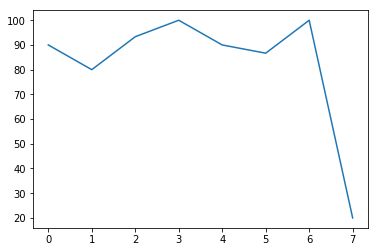

In [77]:
plt.plot(result_array)